In [20]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [65]:
def z(c,l): return(np.exp(c/l))

def Pd(mu,ci,ch,s = 1.3,llambda=1):
    zdi = z(-ci,llambda)
    zdh = z(-ch,llambda)
    zni = z(-s,llambda)
    znh = z(0,llambda)
    uncon = (-mu * zdi + zni - zdh * zni + mu * zdh * zni)/((-1 + zdh) * (zdi - zni))
    
    if mu * np.exp((ci-s)/llambda) + (1-mu) * np.exp(ch/llambda) <= 1:
        uncon = 1
    elif mu * np.exp((s-ci)/llambda) + (1-mu) * np.exp(-ch/llambda) <= 1:
        uncon = 0
    
    return(uncon)


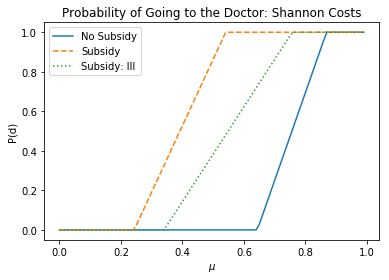

In [87]:
mugrid           = [mu/100 for mu in range(0,100,1)]
Pd_baseline      = [Pd(mu,ci = 1,  ch = 1) for mu in mugrid]
Pd_subsidy_equal = [Pd(mu,ci = .5, ch = .5) for mu in mugrid]
Pd_subsidy_ill   = [Pd(mu,ci = .5, ch = 1) for mu in mugrid]


plt.plot(mugrid, Pd_baseline, label = "No Subsidy")
plt.plot(mugrid, Pd_subsidy_equal, label = "Subsidy", linestyle = "--")
plt.plot(mugrid, Pd_subsidy_ill, label = "Subsidy: Ill",linestyle = ":")
plt.legend()
plt.xlabel(r'$\mu$')
plt.ylabel("P(d)")
plt.title('Probability of Going to the Doctor: Shannon Costs')
plt.savefig('Pd.pdf')

In [92]:
def PdI(mu,ci,ch,s = 1.3,l=1):
    Pdeval = Pd(mu,ci,ch,s,l)
    num = Pdeval*np.exp(-ci/l)
    denom = Pdeval * np.exp(-ci/l) + (1-Pdeval) * np.exp(-s/l)
    return(num/denom)

def PdH(mu,ci,ch,s = 1.3,l=1):
    Pdeval = Pd(mu,ci,ch,s,l)
    num = Pdeval*np.exp(-ch/l)
    denom = Pdeval * np.exp(-ch/l) + (1-Pdeval) * np.exp(-0/l)
    return(num/denom)

In [96]:
PdI_baseline      = [PdI(mu,ci = 1,  ch = 1) for mu in mugrid]
PdI_subsidy_equal = [PdI(mu,ci = .5, ch = .5) for mu in mugrid]
PdI_subsidy_ill   = [PdI(mu,ci = .5, ch = 1) for mu in mugrid]

PdH_baseline      = [PdH(mu,ci = 1,  ch = 1) for mu in mugrid]
PdH_subsidy_equal = [PdH(mu,ci = .5, ch = .5) for mu in mugrid]
PdH_subsidy_ill   = [PdH(mu,ci = .5, ch = 1) for mu in mugrid]

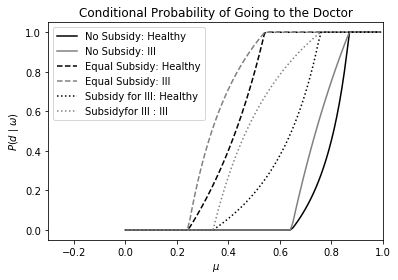

In [112]:
plt.plot(mugrid, PdH_baseline, label = "No Subsidy: Healthy",color="black")
plt.plot(mugrid, PdI_baseline, label = "No Subsidy: Ill",color="gray")
plt.plot(mugrid, PdH_subsidy_equal, label = "Equal Subsidy: Healthy", linestyle = "--",color="black")
plt.plot(mugrid, PdI_subsidy_equal, label = "Equal Subsidy: Ill", linestyle = "--",color="gray")
plt.plot(mugrid, PdH_subsidy_ill, label = "Subsidy for Ill: Healthy", linestyle = ":",color="black")
plt.plot(mugrid, PdI_subsidy_ill, label = "Subsidyfor Ill : Ill", linestyle = ":",color="gray")


plt.legend()
plt.xlabel(r'$\mu$')
plt.ylabel(r"$P(d\mid\omega)$")
plt.xlim(-.3,1)
plt.title('Conditional Probability of Going to the Doctor')
plt.savefig('PdOmega.pdf')